In [110]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [112]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [116]:
model = LogisticRegression()

In [118]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [120]:
df.species = encoder.fit_transform(df.species)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df.species, test_size= 0.2)

In [124]:
len(X_train)

120

In [126]:
len(X_test)

30

In [128]:
model.fit(X_train, y_train)

LogisticRegression()

In [129]:
model.predict(X_test)

array([0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1,
       0, 2, 1, 1, 1, 0, 1, 2])

In [132]:
model.score(X_test, y_test)*100

100.0

## Confustion Matrix

In [136]:
y_predicted = model.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix

In [140]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  7]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

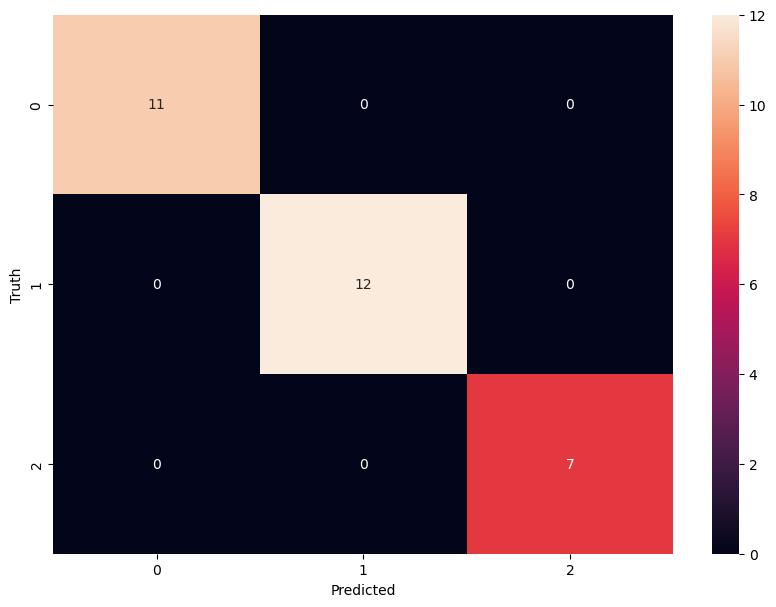

In [143]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')